In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [31]:
df = pd.read_csv("data/pokemon.csv", index_col="pokemon_id")
y = df["max_cp"]
X = df.drop(["max_cp", "pokemon_name"], axis=1)

print("X shape", X.shape)
print("y shape", y.shape)

X shape (1007, 21)
y shape (1007,)


In [32]:
X.head()

,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,attack_probability,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
pokemon_id,,,,,,,,,,,,,,,,,,,,,
1,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",0.0,3,0.1,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
2,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,0.1,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,0.2,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
4,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",0.0,3,0.1,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
5,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,0.1,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


Esta vez no utilizaré la lista de movimientos cargados o rapidos, pero perfectamente se puede trabajar con ellos y buscar otro tipo de conexiones, puedes probar experimentar

Necesitaras convertir la lista de movimeintos

```python
['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']  -> [encoding1, encoding2, encoding3]
```

Trata sobre representar cada moviimiento como palabras de un diccionario, es un ejericio similar a convertir texto y prepararlo para un modelo de lenguaje

In [33]:
X.drop(["charged_moves", "fast_moves"], axis=1, inplace=True)

In [34]:
X = pd.get_dummies(X, columns=['type', "rarity"])
X.head()

,base_attack,base_defense,base_stamina,candy_required,distance,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,...,"type_['Water', 'Ice']","type_['Water', 'Poison']","type_['Water', 'Psychic']","type_['Water', 'Rock']","type_['Water', 'Steel']",type_['Water'],rarity_Legendary,rarity_Mythic,rarity_Standard,rarity_Ultra beast
pokemon_id,,,,,,,,,,,,,,,,,,,,,
1,118,111,128,0.0,3,0.1,-1.0,-1.0,0.15,1.6,...,False,False,False,False,False,False,False,False,True,False
2,151,143,155,25.0,3,0.1,-1.0,-1.0,0.15,1.6,...,False,False,False,False,False,False,False,False,True,False
3,198,189,190,100.0,3,0.2,-1.0,-1.0,0.15,1.6,...,False,False,False,False,False,False,False,False,True,False
4,116,93,118,0.0,3,0.1,-1.0,-1.0,0.15,1.6,...,False,False,False,False,False,False,False,False,True,False
5,158,126,151,25.0,3,0.1,-1.0,-1.0,0.15,1.6,...,False,False,False,False,False,False,False,False,True,False


In [35]:
# algunas features corresponden a nombres de movimientos
X.dtypes

base_attack             int64
base_defense            int64
base_stamina            int64
candy_required        float64
distance                int64
                       ...   
type_['Water']           bool
rarity_Legendary         bool
rarity_Mythic            bool
rarity_Standard          bool
rarity_Ultra beast       bool
Length: 227, dtype: object

# Reducción Dimensionalidad

In [44]:
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

Ahora lo que tenemos son unas enormes 227 columnas de datos, por ello queremos ser capaces de comprimir toda esa información en un espacio más reducido.

Para lograr eso y con una buena eficiencia es buena idea escalar los datos, algunos valores pueden ir en 1000's y otros entre 0 y 1, cosa que hace que sean dificiles de comparar, por ello hemos de usar herramientas como `StandardScaler`

In [36]:
X = StandardScaler().fit_transform(X)

Luego dividimos en datos de `entrenamiento` y `prueba`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=0)

Crear un PCA con 2 componentes para poder graficar y observar los datos

In [55]:
# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Información sobre la varianza explicada
# Imprimir la varianza explicada por los dos primeros componentes en porcentaje
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Componente Principal {i + 1}: {var * 100:.2f}% de la varianza explicada")


Componente Principal 1: 2.01% de la varianza explicada
Componente Principal 2: 1.54% de la varianza explicada


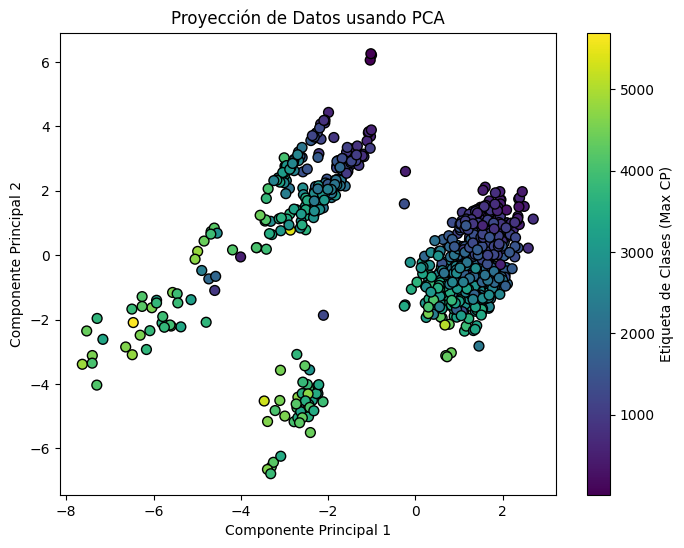

In [56]:
# Graficar los datos proyectados en el nuevo subespacio de 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de Datos usando PCA')
plt.colorbar(label='Etiqueta de Clases (Max CP)')
plt.show()


Como maximo los humanos podemos entender 3 dimensiones sin confusión, por tanto podriamos tomar 3 componentes y observar como se dividen en el espacio.

Componente Principal 1: 2.01% de la varianza explicada
Componente Principal 2: 1.54% de la varianza explicada
Componente Principal 3: 1.15% de la varianza explicada


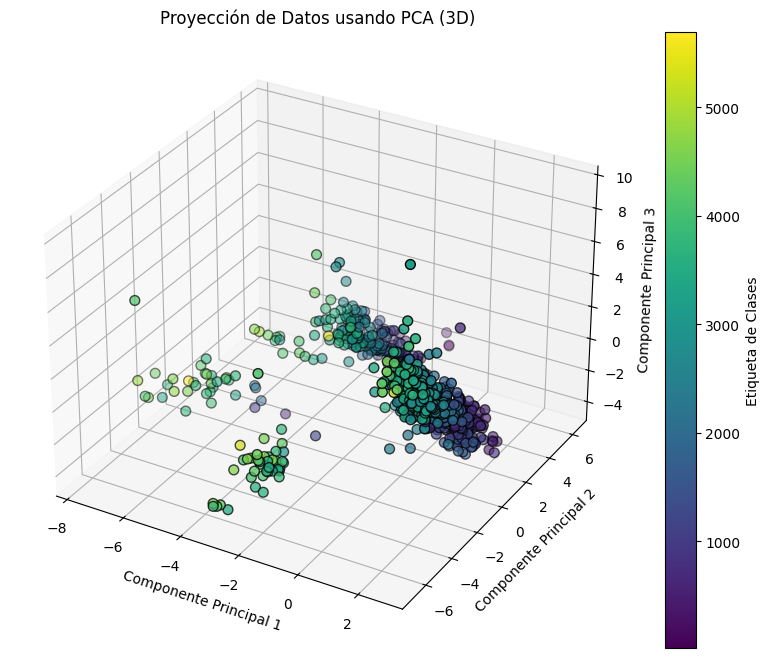

In [58]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar PCA para reducir a 3 componentes principales
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Información sobre la varianza explicada
explained_variance = pca.explained_variance_ratio_
for i, var in enumerate(explained_variance):
    print(f"Componente Principal {i + 1}: {var * 100:.2f}% de la varianza explicada")

# Graficar los datos proyectados en el nuevo subespacio de 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico 3D
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', s=50, edgecolor='k')

# Etiquetas de los ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Proyección de Datos usando PCA (3D)')

# Añadir barra de colores para representar las clases
plt.colorbar(sc, label='Etiqueta de Clases')

# Mostrar la gráfica
plt.show()

Sin embargo hemos observado que PCA la cual es una tecnica lineal, mantiene muy poca varianza con tan pocos componentes

Es posible alternativamente definir cuanta varianza queremos mantener

In [41]:
# scikit-learn elige el numero minimo de componentes para mantener una varianza del 95%
pca = PCA(0.95)
pca.fit(X_train)
print("numero de componentes de PCA:", pca.n_components_)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

numero de componentes de PCA: 185


<a id="Incremental PCA"></a>
### <u> Incremental PCA </u>

PCA requires the whole training set to fit in memory. Incremental PCA splits the training set into mini-batches. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive).

In [68]:
from sklearn.decomposition import IncrementalPCA

n_batches = 10
inc_pca = IncrementalPCA(n_components=80)

for X_batch in np.array_split(X_train, n_batches):
        inc_pca.partial_fit(X_batch)
        
X_train_reduced = inc_pca.transform(X_train)

<a id="Aprendizaje de Variedades"></a>
## <u>Aprendizaje de Variedades</u>

<a id="t-SNE"></a>
### <u>t-SNE</u>

- t-SNE proyecta puntos en un espacio de alta dimensionalidad a una dimensión más baja de manera que las distancias entre los puntos permanezcan casi iguales.

- A diferencia del PCA, t-SNE no es una proyección lineal. Utiliza las relaciones locales entre puntos para crear un mapeo de baja dimensionalidad, lo que le permite capturar estructuras no lineales.
- t-SNE crea una distribución de probabilidad utilizando la distribución Gaussiana que define las relaciones entre los puntos en el espacio de alta dimensionalidad.
- t-SNE utiliza la distribución t de Student para recrear la distribución de probabilidad en el espacio de baja dimensionalidad.
- t-SNE optimiza las incrustaciones directamente usando descenso por gradiente. Sin embargo, la función de costo no es convexa, lo que significa que existe el riesgo de quedarse atascado en mínimos locales. Esto tiene una consecuencia importante: t-SNE es no determinista. Al ejecutarlo varias veces, podemos obtener resultados diferentes en cada ocasión.

t-SNE utiliza “vecinos estocásticos”, lo que significa que no hay una línea clara que determine qué puntos son vecinos de otros. Esta falta de bordes claros permite que t-SNE tome en cuenta tanto la estructura global como la local de manera natural. La estructura local es más importante que la global, pero los puntos lejanos no se ignoran por completo, lo que permite una reducción de dimensionalidad "bien equilibrada".

#### <u>Algoritmo de t-SNE</u>:

<b>Paso 1</b>: En el espacio de alta dimensionalidad, crear una distribución de probabilidad que dicte las relaciones entre varios puntos vecinos.

<b>Paso 2</b>: Luego trata de recrear un espacio de baja dimensionalidad que siga dicha distribución de probabilidad lo mejor posible.

#### <u>¿Por qué necesitamos t-SNE?</u>

El PCA no puede capturar dependencias no lineales. Por ejemplo, PCA no sería capaz de "desenrollar" la siguiente estructura.


A linear projection is like casting a shadow. Unlike PCA, t-SNE is not limited to linear projections, which makes it suited to all sorts of datasets.

In [77]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300)
X_reduced = tsne.fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 855 samples in 0.002s...
[t-SNE] Computed neighbors for 855 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 855 / 855
[t-SNE] Mean sigma: 4.197865
[t-SNE] KL divergence after 100 iterations with early exaggeration: 63.047428
[t-SNE] KL divergence after 300 iterations: 0.770918


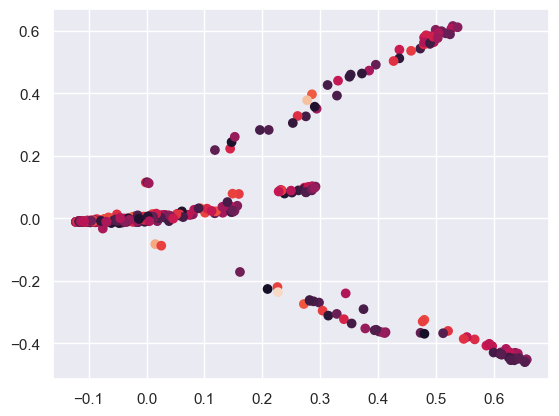

In [81]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)

<a id="Kernel PCA"></a>
### <u>  Kernel PCA </u>

Kernel PCA can perform complex nonlinear projections for dimensionality reduction. It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

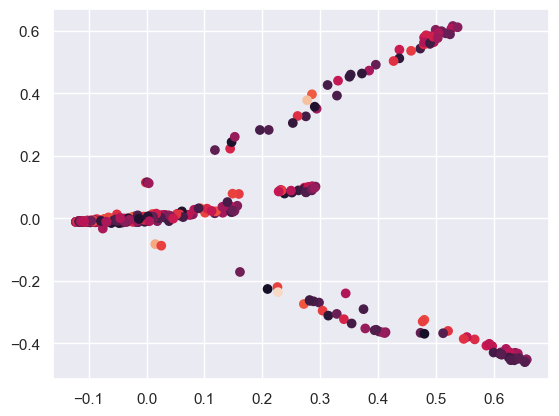

In [82]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_train)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)

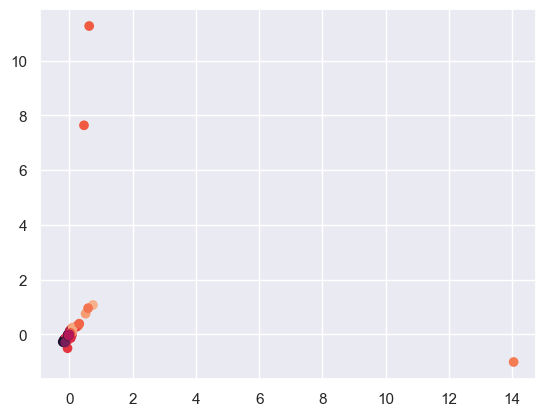

In [84]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="poly")
X_reduced = rbf_pca.fit_transform(X_train)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train)

<a id="LLE"></a>
### <u> LLE </u>

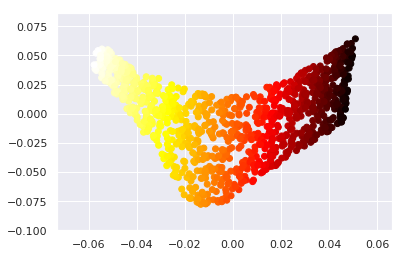

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

<a id="Isomap"></a>
### <u> Isomap </u>

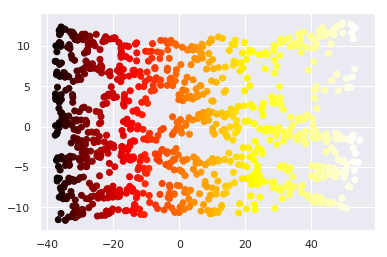

In [23]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_reduced = isomap.fit_transform(X)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)

#### End
If you reached this far please comment and upvote this kernel, feel free to make improvements on the kernel and please share if you found anything useful !